# Customer Churn Prediction for a Telecom Provider
__Core Problem :__

"The central challenge is to minimize customer churn and its associated revenue loss. We must develop a system to proactively flag high-risk customers, empowering our retention teams to intervene with timely and effective strategies."


## 01-Setup and Initial Exploration

In [23]:
!pip install pandas numpy seaborn matplotlib scikit-learn xgboost
!pip install lightgbm catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 3.9/102.4 MB 18.1 MB/s eta 0:00:06
   --- ------------------------------------ 8.4/102.4 MB 19.3 MB/s eta 0:00:05
   ----- ---------------------------------- 12.8/102.4 MB 20.1 MB/s eta 0:00:05
   ------ --------------------------------- 16.3/102.4 MB 18.9 MB/s eta 0:00:05
   -------- ------------------------------- 21.5/102.4 MB 20.3 MB/s eta 0:00:04
   ---------- ----------------------------- 26.5/102.4 MB 21.0 MB/s eta 0:00:04
   ------------ --------------------------- 32.2/102.4 MB 21.8 MB/s eta 0:00:04
   -------------- ------------------------- 37.7/102.4 MB 22.2 MB/s e

In [42]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report , confusion_matrix


# Loading the Dataset
raw_url = "https://raw.githubusercontent.com/Javadhamidi99/Customer-Churn-Prediction-for-a-Telecome-Company--Business-Marketing/refs/heads/main/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(raw_url)

# Seeing the First Rows of the Dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Getting a Summary from our Dataset
df.info()

# Getting a statistical Summary of our Dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 01-01 Small Corrections in our Data Set
Fixing the Data Type for TotalCharges from object to float 64

In [7]:
# Check to see if we have empty values in our column
df['TotalCharges'].value_counts()

# Replacing Empty values with 0
df['TotalCharges'] = df['TotalCharges'].replace(" " , '0')

# Changing the type of the column
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# 02-Exploratory Data Analysis (EDA)
"This is the data understanding and feature engineering stage. We act as 'data detectives' to uncover the data's story—what it tells us, its limitations, and how we can best prepare it for our analysis. Our goal is to select the most impactful features and parameters, and to remove or refine any parts of the data that might hinder our progress."

## 02-01 Analysing the Target Variable (Churn)
To check for class imbalance, we count the occurrences of each class within our target variable. This helps us understand if the dataset has an uneven distribution, where one class significantly outnumbers the others.

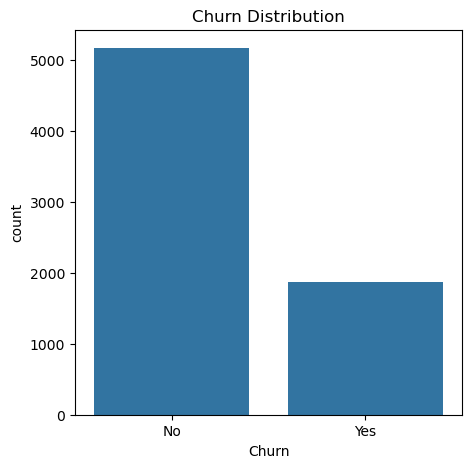

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [8]:
# Creating a count plot for Churn parameter
plt.figure(figsize = (5,5))
sns.countplot( x = 'Churn' , data = df)
plt.title('Churn Distribution')
plt.show()

# Getting the Actual percentage
print(df['Churn'].value_counts(normalize = True))

## 02-02 Analyzing Features against Churn
Let's analyze if the contract type has any correlation with our churn rate.

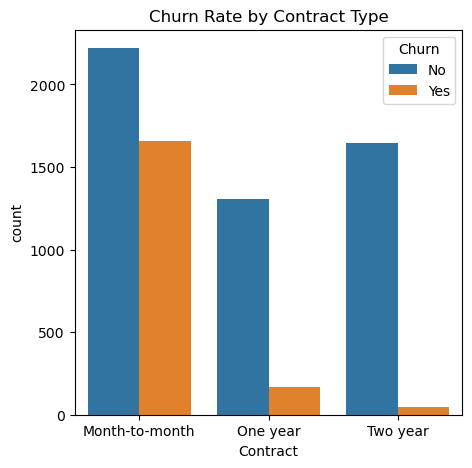

In [9]:
# 01 - Churn by Contract Type
plt.figure(figsize = (5,5))
sns.countplot( x = 'Contract' ,hue='Churn' , data = df)
plt.title('Churn Rate by Contract Type')
plt.show()

From the visualization, a clear relationship between contract type and churn rate is evident. We can observe that as the contract length increases, the churn rate significantly decreases. Customers on a month-to-month contract have the highest churn rate, while those on a two-year contract have the lowest.

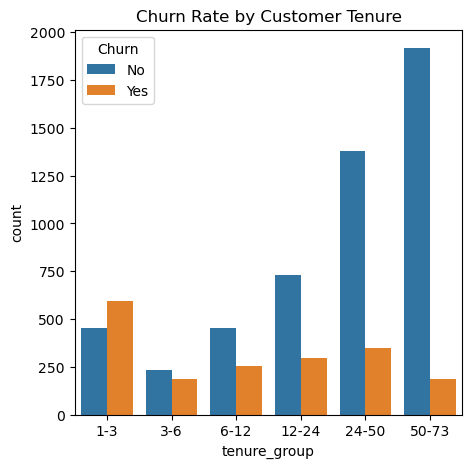

In [10]:
# 02 - Churn rate by customer tenure
# Due to the high number of unique values in tenure , we have to bin this column
bins = [0, 3, 6, 12, 24,50, 73]
bins_labels = ['1-3' , '3-6', '6-12', '12-24', '24-50', '50-73']
df['tenure_group'] = pd.cut(df['tenure'], bins, labels = bins_labels)

# Creating the actual plot
plt.figure(figsize = (5,5))
sns.countplot(x = 'tenure_group' , hue='Churn' , data = df)
plt.title('Churn Rate by Customer Tenure')
plt.show()

Based on the visualization, it's clear that customer tenure and churn rate are related. Customers in their first 3 months have the highest churn rate. This rate then drops significantly for those in the 3-6 month tenure group.

Interestingly, the churn rate appears to gradually increase again as tenure extends beyond the 6-month mark. This unexpected trend warrants further investigation to understand why long-term customers might be increasingly at risk of churning.

# 03-Data Preprocessing and Feature Engineering
Machine learning models require clean, numerical data. In this step, we'll preprocess the dataset to handle missing values, encode categorical variables, and scale numerical features, transforming it into a format our model can use.

## 03-01 Clean Data Types and Handle Missing Values

In [11]:
# Drop the few rows with missing values
df.dropna(inplace=True)

## 03-02 Encoding Categorial Variables
To prepare our data for machine learning models, which only process numerical data, we must encode our categorical features. This process transforms text-based categories into a numerical format the models can understand.

In [12]:
# Encoding the target variable (Churn)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Selecting all the other categorial columns
categorial_cols =df.select_dtypes(include = 'object').columns

# Dropping the Customer ID Column (It is not useful for our model )
categorial_cols = categorial_cols.drop('customerID')

# Using one-hot coding technique to convert these to numbers
df_ml = pd.get_dummies(df, columns= categorial_cols, drop_first = True)

df_ml.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1-3,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,0,24-50,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,1,1-3,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,0,24-50,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,1,1-3,False,False,False,...,False,False,False,False,False,False,True,False,True,False


## 03-03 Scaling Numerical Values
We scale features like tenure and MonthlyCharges to prevent those with a larger range of values from disproportionately influencing the model's performance. This ensures that each feature contributes equally to the learning process.

In [14]:
scaler = StandardScaler()
df_ml['Churn'] = df_ml['Churn'].astype('object')
numerical_cols = df_ml.select_dtypes(include= ('float64' , 'int64')).columns
df_ml[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_ml['Churn'] = df_ml['Churn'].astype('int64')
df_ml.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-0.440327,-1.280248,-1.161694,-0.994194,0,1-3,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,-0.440327,0.064303,-0.260878,-0.173740,0,24-50,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,-0.440327,-1.239504,-0.363923,-0.959649,1,1-3,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,-0.440327,0.512486,-0.747850,-0.195248,0,24-50,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,-0.440327,-1.239504,0.196178,-0.940457,1,1-3,False,False,False,...,False,False,False,False,False,False,True,False,True,False


# 04 Model Building and Training
Once our data is prepared, we'll proceed with model training and evaluation. This process involves three key steps:

1. Data Splitting
First, we'll divide the dataset into three subsets: a training set, a validation set, and a test set.  This is crucial for evaluating a model's performance on unseen data and preventing overfitting. The model learns from the training data, is tuned using the validation set, and is then evaluated for final performance on the test set.

2. Model Training and Selection
Next, we'll train several different models on the training data. This allows us to compare their performance and identify which algorithm is best suited for our specific problem.

3. Hyperparameter Tuning
Finally, we'll take the best-performing model and fine-tune its hyperparameters. Hyperparameters are external settings that control how a model learns (e.g., the learning rate or the number of trees in a random forest). By optimizing these settings on the validation set, we can maximize the model's predictive accuracy before its final evaluation on the test set.

## 04-01 Splitting the Data into Training , Validation and Test Set
To build the most effective model, we'll use a train-validation-test split instead of just a train-test approach. This method allows us to tune our model's hyperparameters on the validation set while reserving the test set for a final, unbiased evaluation of its performance.

In [20]:
# Defining the features and the target
X = df_ml.drop(['Churn' , 'customerID','tenure_group'], axis = 1)
y = df_ml['Churn']

# Extracting the test set from the whole set
X_train_val , X_test , y_train_val , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 , stratify = y)

# Splitting the train set furthermore into validation and train
 # 0.25 * 0.8 = 0.2
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42 , stratify = y_train_val)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (4218, 30)
X_val shape: (1407, 30)
X_test shape: (1407, 30)


## 04-02 Comparing different ML Models

In this project, I will compare the performance of three different models to identify the most promising candidate for further optimization.

In [31]:
  # Initiate the Models
models = {
    "Logistic Regression" : LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost" : XGBClassifier(max_depth=10, random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0), # verbose=0 keeps the output clean
    "SVC": SVC(random_state=42)
}

# Loop to train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Making prediction on the valuation Set
    y_pred_val = model.predict(X_val)
    
    # Calculating the F1 Score
    Score = f1_score(y_val, y_pred_val)
    Recall_score = recall_score(y_val , y_pred_val)
    print(f" {name} F1 score: {Score}")
    print(f"{name} Recall score {Recall_score}")

 Logistic Regression F1 score: 0.5590433482810164
Logistic Regression Recall score 0.5
 Random Forest F1 score: 0.5221518987341772
Random Forest Recall score 0.4411764705882353
 XGBoost F1 score: 0.5325264750378215
XGBoost Recall score 0.47058823529411764
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1121, number of negative: 3097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 4218, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265766 -> initscore=-1.016213
[LightGBM] [Info] Start training from score -1.016213
 LightGBM F1 score: 0.5589123867069486
LightGBM Recall score 0.4946524064171123
 CatBoost F1 score: 0.54003139

Both Logistic Regression and LightGBM have emerged as the top-performing models. We will now focus on optimizing their hyperparameters to maximize their performance.

## 04-03 Hyperparameter Tuning the Best Model
We use Grid Search to find the optimal combination of hyperparameters for our model. This method systematically tests all possible parameter combinations specified in a grid to identify the set that yields the best performance on our dataset.

### 04-03-01 Tuning Logistic Regression
For __Logistic Regression__, the most important hyperparameters control the regularization, which is a technique to prevent overfitting by penalizing complex models.

__C__: The inverse of regularization strength. Smaller values specify stronger regularization.

__penalty__: The type of penalty to use (l1, l2, elasticnet).

__solver__: The algorithm to use for optimization. Different solvers support different penalties.

In [32]:
# Defining the Parameter Grid
# We will test different solvers , penalties and regularization strnghts
param_grid_ls = {
    "C" : [0.1 , 1 , 10 , 12],
    "penalty" : ['l1' , 'l2'],
    "solver" : ['liblinear' , 'saga']
}

# Initiating the GridSearch oobject
# We use 'recal' as the scoring metric to priorotize finding actual churners
grid_search_lr = GridSearchCV(
    estimator= LogisticRegression(random_state=42 , max_iter=5000),
    param_grid= param_grid_ls,
    scoring='recall',
    cv = 5,    # 5 fold cross validation
    n_jobs=1,  # Use all available CPU cores
    verbose=1, # Print progress
)

# Fit the grid search to the training data 
grid_search_lr.fit(X_train , y_train)

# Printing the best parameter and the best score
print("best parameters for Logistic Regression" , grid_search_lr.best_params_)
print("Best Recall score for Logistic Regression (Recall)" , grid_search_lr.best_score_)  


Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters for Logistic Regression {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Recall score for Logistic Regression (Recall) 0.568202380952381


### 04-03-02 Tuning LightGBM (LGBM)
LightGBM is a gradient boosting model. Its key hyperparameters control the trade-off between speed and accuracy by managing the complexity of the decision trees being built.

__n_estimators__: The number of boosting rounds or trees to build.

__learning_rate__: The step size. A smaller learning rate requires more estimators but can lead to better generalization.

__num_leaves__: The maximum number of leaves in one tree. This is a key parameter for controlling model complexity.

__max_depth__: The maximum depth of a tree.



In [39]:
# Defining the Parameter Grid
# We will test different solvers , penalties and regularization strnghts
param_grid_lgbm = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.2],
    'num_leaves' : [31, 40, 50],
    'max_depth' : [-1, 10, 20]
}

# Initiating the GridSearch oobject
# We use 'recal' as the scoring metric to priorotize finding actual churners
grid_search_lgbm = GridSearchCV(
    estimator= LGBMClassifier(random_state=42,verbose= -1),
    param_grid= param_grid_lgbm,
    scoring='recall',
    cv = 5,    # 5 fold cross validation
    n_jobs=1,  # Use all available CPU cores
    verbose = 1
)

# Fit the grid search to the training data 
grid_search_lgbm.fit(X_train , y_train)

# Printing the best parameter and the best score
print("best parameters for LightGBM" , grid_search_lgbm.best_params_)
print("Best Recall score for LightGBM" , grid_search_lgbm.best_score_)  

Fitting 5 folds for each of 81 candidates, totalling 405 fits
best parameters for LightGBM {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}
Best Recall score for LightGBM 0.5512896825396825


# 05-Final Evaluation on the Test Set
Based on our analysis, the tuned Logistic Regression model slightly outperforms the LightGBM model. Therefore, we'll proceed by evaluating the final performance of our chosen model on the held-out test set.


--- Final Model Evaluation on Test Set ---
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.87      1033
       Churn       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407



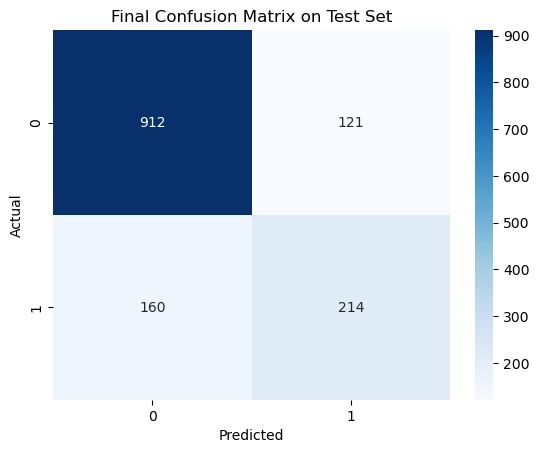

In [48]:
# Defining the best Mmodel
best_model = LogisticRegression(random_state=42 , C=10 , penalty='l1' , solver='saga', max_iter=5000)
best_model.fit(X_train_val,y_train_val)

# Making the final prediction on the TEST set
y_pred_test = best_model.predict(X_test)

# Printing the final Cclassification_report
print("\n--- Final Model Evaluation on Test Set ---")
print(classification_report(y_test , y_pred_test , target_names=('No Churn' , 'Churn')))

# Ploting the final Cconfusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix on Test Set')
plt.show()